In [1]:
from Utils_16S_Analysis import *

rcParams = {'font.size': 24, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Read_Alignments/'
samples = listdir(filedir+'Alpha_Alleles/paf_files/')

In [3]:
df_all_abundances = pd.DataFrame()
df_paired_end_read_abundances = pd.DataFrame()

for s in samples:
    df_alpha = Load_PAF(filedir+'Alpha_Alleles/paf_files/'+s, s)
    df_beta = Load_PAF(filedir+'Beta_Alleles/paf_files/'+s, s)
    df_gamma = Load_PAF(filedir+'Gamma_Alleles/paf_files/'+s, s)
    Temp = pd.DataFrame()
    Temp = Temp.append(df_alpha).append(df_beta).append(df_gamma)
    
    df_all_abundances = df_all_abundances.append(Temp, ignore_index = True)
    df_paired_end = Merge_Paired_Ends(Temp)
    df_paired_end['Sample'] = s.replace("_FD.paf","")
    df_paired_end_read_abundances = df_paired_end_read_abundances.append(df_paired_end.reset_index())

    print(s, len(Temp), len(df_paired_end)*2)

HotsprSampleMS50_FD.paf 57706 39354
HotsprottomLayer_2_FD.paf 23328 9780
Hotspr2Sample149_FD.paf 35048 19636
HotsprSampleR4cd_FD.paf 196714 135482
HotsprSampOS1265_FD.paf 71407 55842
HotsprSampleOS50_FD.paf 36496 23546
HotsprSampleOS60_FD.paf 135780 104134
HotsprOSTMatCore_FD.paf 10564 1856
Hotspr20SampleT9_FD.paf 108202 76642
HotsprSampleMSe2_FD.paf 86923 59922
HotsprSampleMSe3_FD.paf 68348 47508
HotsprSampleMS13_FD.paf 78942 51624
Hotspr20SampleP4_FD.paf 176678 121456
HotsprSampleOSM1_FD.paf 131932 103128
HotsprSampOS1260_FD.paf 123703 98500
HotsprSampleMSe1_FD.paf 79621 53676
HotsprSampleMS60_FD.paf 67761 50210
HotsprSampleMSe4_FD.paf 114401 79384
Hotspr2Sampleee2_FD.paf 150787 109172
Hotspr2SamplePe2_FD.paf 76250 52992
Hotspr20Samplem2_FD.paf 97141 71518
Hotspr2Sample148_FD.paf 41197 23352
HotsprSampleMS65_FD.paf 133392 108006
Hotspr20Samplet1_FD.paf 118851 90030
HotsprSampleOSM2_FD.paf 34485 24722
Hotspr2Sampleme2_FD.paf 77097 54002
HotsprSampleOSM3_FD.paf 97064 72950
Hotspr20Samp

In [5]:
window_size = 200
max_window = 1300-window_size
step_size = 50

out = {}
for genome in df_paired_end_read_abundances['Subject'].unique():
    op = []
    df_filter = df_paired_end_read_abundances[df_paired_end_read_abundances['Subject'] == genome]
    for mate1_start in range(0, 1100, 100):
        print(mate1_start)
        mate1_end = mate1_start + window_size
        for j in range(0, max_window, step_size):

            mate2_start, mate2_end = j, j+window_size
            cond_1 = (((df_filter[('SStart','1')] >= mate1_start) & (df_filter[('SEnd','1')] <= mate1_end)) &
                      ((df_filter[('SStart','2')] >= mate2_start) & (df_filter[('SEnd','2')] <= mate2_end)))

            cond_2 = (((df_filter[('SStart','1')] >= mate2_start) & (df_filter[('SEnd','1')] <= mate2_end)) &
                      ((df_filter[('SStart','2')] >= mate1_start) & (df_filter[('SEnd','2')] <= mate1_end)))
            d = {'Window_Start' : mate1_start, 'Distance_Between_2_Windows' : (mate2_start - mate1_end),
                 'Num_Mates' : len(df_filter.loc[cond_1 | cond_2])}
            op.append(d)
    df_windows = pd.DataFrame(op)
    df_windows = df_windows.set_index('Window_Start')
    out[genome] = df_windows

0
100
200
300
400
500
600
700
800
900
1000
0
100
200
300
400
500
600
700
800
900
1000
0
100
200
300
400
500
600
700
800
900
1000


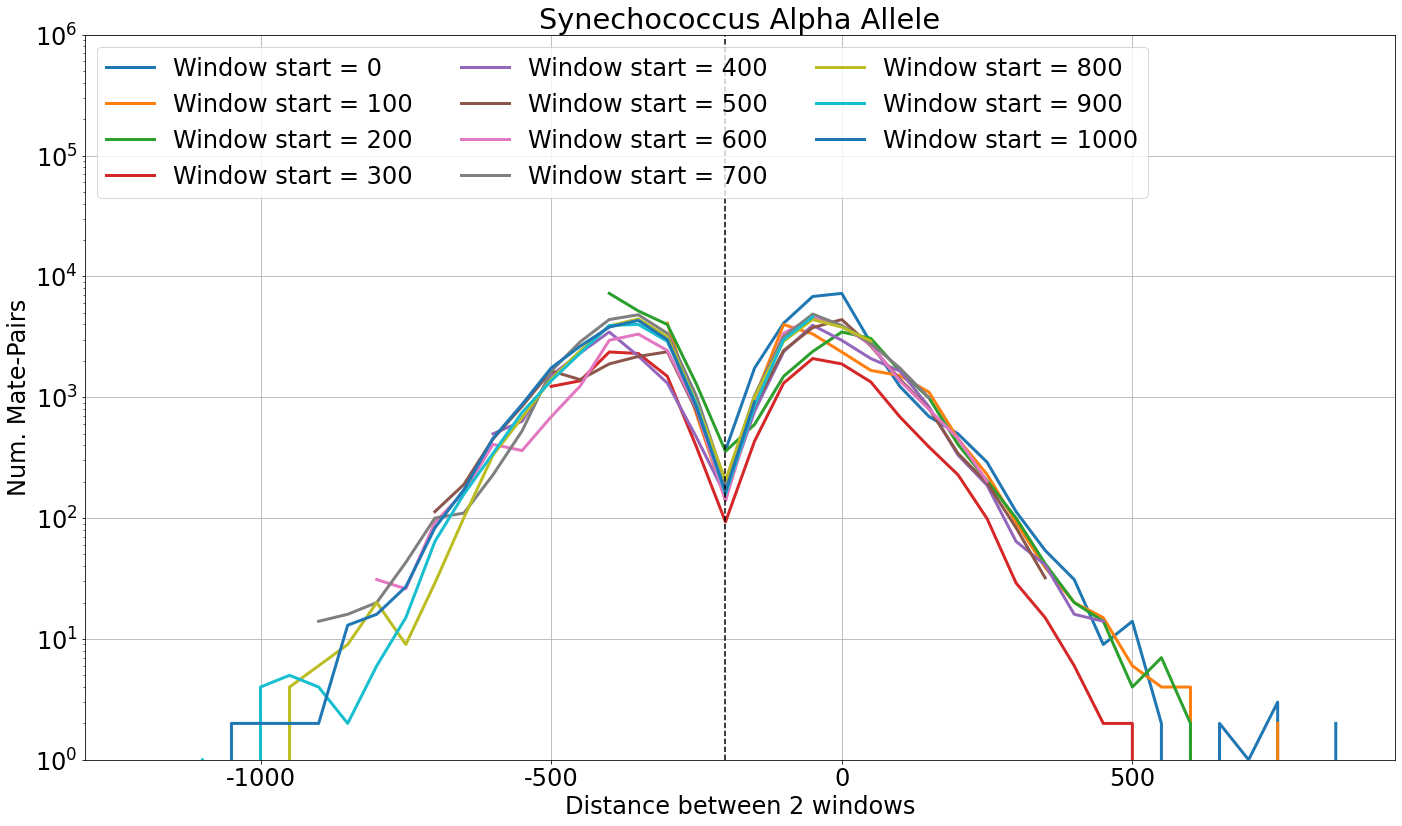

In [14]:
plt.rcParams.update(rcParams)

fig, ax = plt.subplots(1,1,figsize = (20,12))
for m1 in range(0, 1100, 100):
    ax.plot(out['Synechococcus_Alpha_16SrRNA'].loc[m1,'Distance_Between_2_Windows'],
            out['Synechococcus_Alpha_16SrRNA'].loc[m1,'Num_Mates'], 
            label = 'Window start = '+str(m1), linewidth = 3)
    
ax.axvline(-200, color = 'black',linestyle = '--')
ax.set_xlabel('Distance between 2 windows')
ax.set_ylabel('Num. Mate-Pairs')
ax.set_yscale('log')
ax.legend(ncol = 3, loc=2)
ax.set_ylim([1, 1000000])
ax.grid()
ax.set_title('Synechococcus Alpha Allele')
fig.tight_layout()

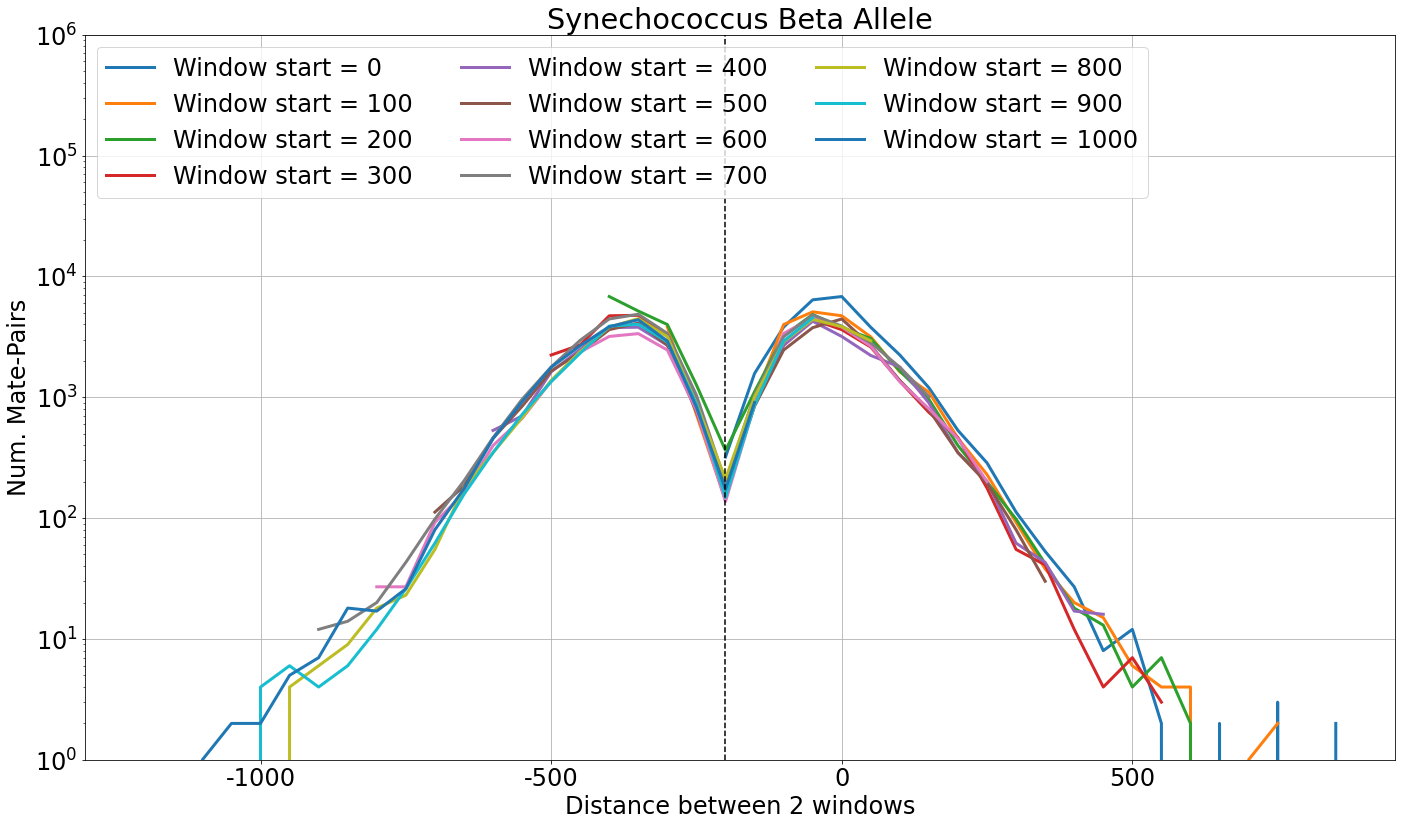

In [15]:
fig, ax = plt.subplots(1,1,figsize = (20,12))
for m1 in range(0, 1100, 100):
    ax.plot(out['Synechococcus_Beta_16SrRNA'].loc[m1,'Distance_Between_2_Windows'],
            out['Synechococcus_Beta_16SrRNA'].loc[m1,'Num_Mates'], 
            label = 'Window start = '+str(m1), linewidth = 3)
    
ax.axvline(-200, color = 'black',linestyle = '--')
ax.set_xlabel('Distance between 2 windows')
ax.set_ylabel('Num. Mate-Pairs')
ax.set_yscale('log')
ax.legend(ncol = 3, loc=2)
ax.set_ylim([1, 1000000])
ax.grid()
ax.set_title('Synechococcus Beta Allele')
fig.tight_layout()

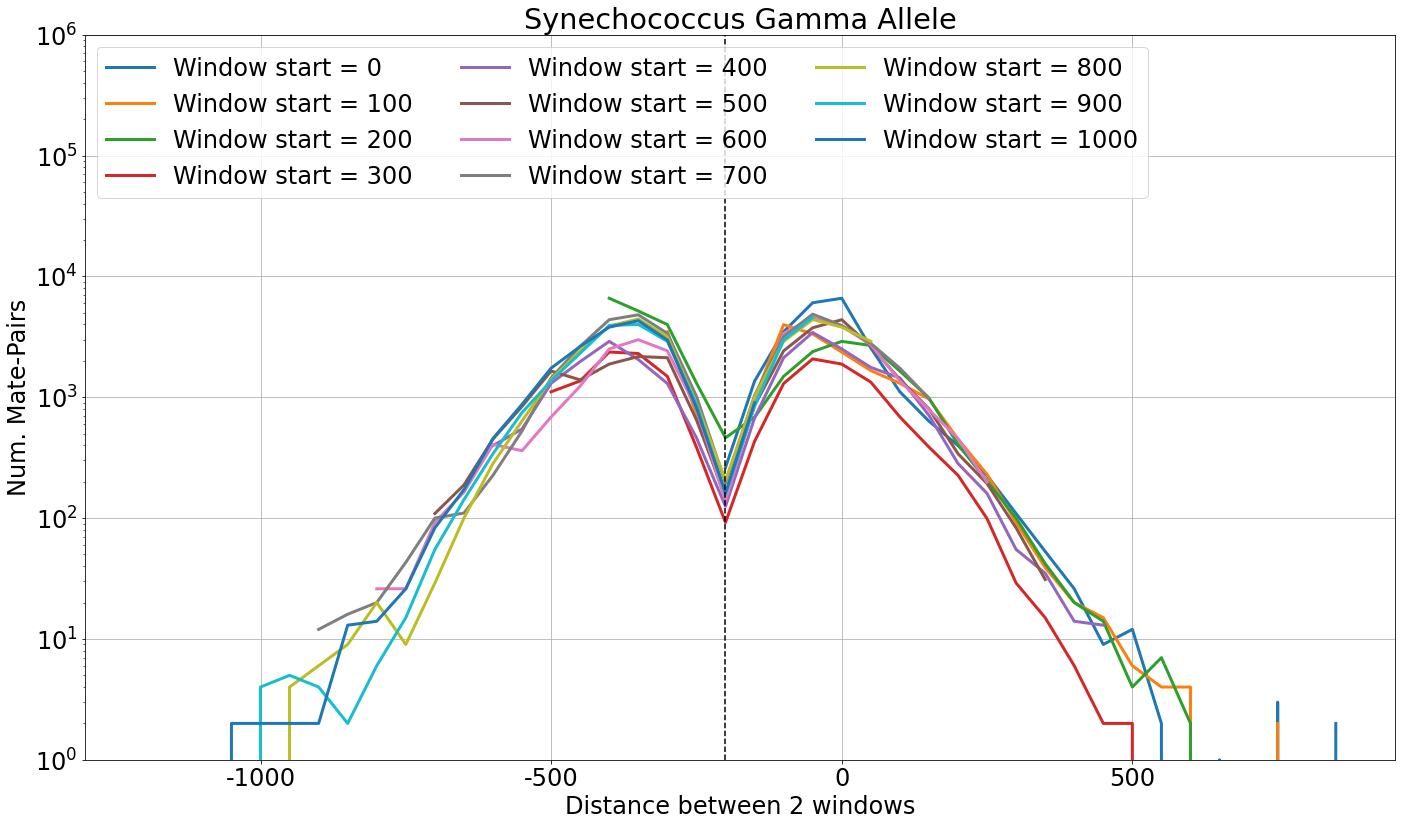

In [16]:
fig, ax = plt.subplots(1,1,figsize = (20,12))
for m1 in range(0, 1100, 100):
    ax.plot(out['Synechococcus_Gamma_16SrRNA'].loc[m1,'Distance_Between_2_Windows'],
            out['Synechococcus_Gamma_16SrRNA'].loc[m1,'Num_Mates'], 
            label = 'Window start = '+str(m1), linewidth = 3)
    
ax.axvline(-200, color = 'black',linestyle = '--')
ax.set_xlabel('Distance between 2 windows')
ax.set_ylabel('Num. Mate-Pairs')
ax.set_yscale('log')
ax.legend(ncol = 3, loc=2)
ax.set_ylim([1, 1000000])
ax.grid()
ax.set_title('Synechococcus Gamma Allele')
fig.tight_layout()